In [1]:
import os
import pandas as pd

In [2]:
pd.__version__

'1.1.3'

In [3]:
csv_path = "/home/icer/Project/openface_dir/output_vid_dir/test.csv"
df = pd.read_csv(csv_path, engine='python')

In [4]:
# 元のcsvのカラム名の先頭に空白があるため
columns_dict = {}
for column_name in df.columns:
    columns_dict[column_name] = column_name.lstrip()
columns_dict
df = df.rename(columns=columns_dict)

In [5]:
_df = df[["frame", "face_id", "timestamp", "confidence", "success", "pose_Rx", "pose_Ry", "pose_Rz", "eye_lmk_x_25", "eye_lmk_y_25", "eye_lmk_x_53", "eye_lmk_y_53"]]
_df

,frame,face_id,timestamp,confidence,success,pose_Rx,pose_Ry,pose_Rz,eye_lmk_x_25,eye_lmk_y_25,eye_lmk_x_53,eye_lmk_y_53
0,1,0,0.000,0.22,0,0.115,0.132,0.075,1745.7,772.3,1774.2,775.1
1,1,1,0.000,0.03,0,-0.086,-0.645,-0.173,584.2,798.5,615.7,793.6
2,1,2,0.000,0.93,1,0.039,-0.366,-0.055,41.4,719.3,83.1,714.3
3,1,3,0.000,0.98,1,0.010,0.742,0.043,2091.8,764.6,2125.7,764.0
4,2,0,0.033,0.03,0,0.166,0.226,0.123,1748.2,771.9,1775.4,776.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,542,3,18.051,0.98,1,-0.066,0.183,-0.156,2107.9,760.7,2136.8,756.5
2070,543,0,18.085,0.88,1,0.109,0.736,0.024,1740.7,774.2,1763.6,774.8
2071,543,1,18.085,0.98,1,0.144,-1.334,-0.026,605.4,791.5,625.6,787.5
2072,543,2,18.085,0.98,1,0.011,-0.112,-0.008,49.2,694.1,87.7,689.6


In [6]:
new_df = _df.copy()
print(new_df.columns)
new_df.loc[:, ['face_coord_x']] = (new_df['eye_lmk_x_25'] + new_df['eye_lmk_x_53']) / 2
new_df.loc[:, ['face_coord_y']] = (new_df['eye_lmk_y_25'] + new_df['eye_lmk_y_53']) / 2
new_df

Index(['frame', 'face_id', 'timestamp', 'confidence', 'success', 'pose_Rx',
       'pose_Ry', 'pose_Rz', 'eye_lmk_x_25', 'eye_lmk_y_25', 'eye_lmk_x_53',
       'eye_lmk_y_53'],
      dtype='object')


,frame,face_id,timestamp,confidence,success,pose_Rx,pose_Ry,pose_Rz,eye_lmk_x_25,eye_lmk_y_25,eye_lmk_x_53,eye_lmk_y_53,face_coord_x,face_coord_y
0,1,0,0.000,0.22,0,0.115,0.132,0.075,1745.7,772.3,1774.2,775.1,1759.95,773.70
1,1,1,0.000,0.03,0,-0.086,-0.645,-0.173,584.2,798.5,615.7,793.6,599.95,796.05
2,1,2,0.000,0.93,1,0.039,-0.366,-0.055,41.4,719.3,83.1,714.3,62.25,716.80
3,1,3,0.000,0.98,1,0.010,0.742,0.043,2091.8,764.6,2125.7,764.0,2108.75,764.30
4,2,0,0.033,0.03,0,0.166,0.226,0.123,1748.2,771.9,1775.4,776.3,1761.80,774.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,542,3,18.051,0.98,1,-0.066,0.183,-0.156,2107.9,760.7,2136.8,756.5,2122.35,758.60
2070,543,0,18.085,0.88,1,0.109,0.736,0.024,1740.7,774.2,1763.6,774.8,1752.15,774.50
2071,543,1,18.085,0.98,1,0.144,-1.334,-0.026,605.4,791.5,625.6,787.5,615.50,789.50
2072,543,2,18.085,0.98,1,0.011,-0.112,-0.008,49.2,694.1,87.7,689.6,68.45,691.85


In [7]:
face_id_dict = {}
for index, row in new_df[(new_df['frame'] == 1)].iterrows():
    face_id_dict[index] = (row['face_coord_x'], row['face_coord_y'])
face_id_dict

{0: (1759.95, 773.7),
 1: (599.95, 796.05),
 2: (62.25, 716.8),
 3: (2108.75, 764.3)}

In [8]:
import math
def match_face_id(face_coord, face_id_dict):
    min_face_id = None
    min_coord_diff = (float('inf'), float('inf'))
    min_dist = float('inf')
    for k, v in face_id_dict.items():
        tmp_coord_diff = (abs(v[0] - face_coord[0]), abs(v[1] - face_coord[1]))
        tmp_dist = math.sqrt(tmp_coord_diff[0] ** 2 + tmp_coord_diff[1] ** 2)
        if tmp_dist < min_dist:
            min_face_id = k
            min_coord_diff = tmp_coord_diff
            min_dist = tmp_dist
    return min_face_id, min_dist, min_coord_diff
        
counter = 0
total_dist = 0
output_df = new_df.copy()

for index, row in new_df.iterrows():
    face_coord = (row['face_coord_x'], row['face_coord_y'])
    face_id = row['face_id']
    
    new_face_id, dist, coord_diff = match_face_id(face_coord, face_id_dict)
    output_df.loc[index, 'new_face_id'] = new_face_id
    
    if face_id != new_face_id:
#         print(f"[{index}] not matched!: old_id: {face_id}, new_id: {new_face_id} (dist: {dist}, diff: {coord_diff})")
#         print(row)
        counter += 1
        total_dist += dist
        output_df.loc[index, 'face_id_update'] = True
    else:
        output_df.loc[index, 'face_id_update'] = False

print(f"\n====\nmiss match total: {counter}")
print(f"average dist: {dist / counter}")

# output_df.to_csv("new_test.csv", encoding="shift_jis", index=False)
# 検出に成功した結果のみ抽出
suc_output_df = output_df[output_df['success'] == 1]
suc_output_df.to_csv("successed_new_test.csv", encoding="shift_jis", index=False)


====
miss match total: 126
average dist: 0.11724696410606472


In [9]:
print(f"id-0: {len(suc_output_df[suc_output_df['new_face_id'] == 0])}")
print(f"id-1: {len(suc_output_df[suc_output_df['new_face_id'] == 1])}")
print(f"id-2: {len(suc_output_df[suc_output_df['new_face_id'] == 2])}")
print(f"id-3: {len(suc_output_df[suc_output_df['new_face_id'] == 3])}")

id-0: 439
id-1: 261
id-2: 529
id-3: 543


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['lines.markersize'] = 2.0

array([<AxesSubplot:xlabel='timestamp'>], dtype=object)

<Figure size 432x288 with 0 Axes>

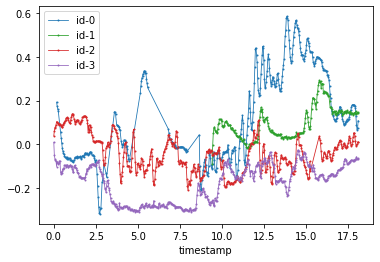

In [12]:
# Rotation-x
plt.figure()

ax = suc_output_df[suc_output_df['new_face_id'] == 0].plot(x='timestamp', y='pose_Rx', label='id-0', marker='.')
suc_output_df[suc_output_df['new_face_id'] == 1].plot(x='timestamp', y='pose_Rx', label='id-1', marker='.', ax=ax, color='C2')
suc_output_df[suc_output_df['new_face_id'] == 2].plot(x='timestamp', y='pose_Rx', label='id-2', marker='.', ax=ax, color='C3')
suc_output_df[suc_output_df['new_face_id'] == 3].plot(x='timestamp', y='pose_Rx', label='id-3', marker='.', ax=ax, color='C4', subplots=True)

# plt.savefig('pose_Rx.png', facecolor='white', dpi=300)
# plt.close('all')


array([<AxesSubplot:xlabel='timestamp'>], dtype=object)

<Figure size 432x288 with 0 Axes>

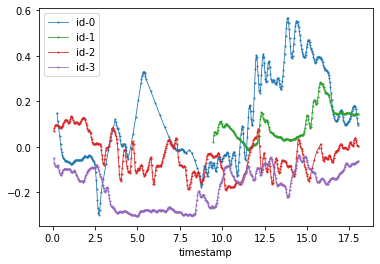

In [13]:
# Rotation-x + 移動平均
plt.figure()

ws = 5
ax = suc_output_df[suc_output_df['new_face_id'] == 0].rolling(ws).mean().plot(x='timestamp', y='pose_Rx', label='id-0', marker='.')
suc_output_df[suc_output_df['new_face_id'] == 1].rolling(ws).mean().plot(x='timestamp', y='pose_Rx', label='id-1', marker='.', ax=ax, color='C2')
suc_output_df[suc_output_df['new_face_id'] == 2].rolling(ws).mean().plot(x='timestamp', y='pose_Rx', label='id-2', marker='.', ax=ax, color='C3')
suc_output_df[suc_output_df['new_face_id'] == 3].rolling(ws).mean().plot(x='timestamp', y='pose_Rx', label='id-3', marker='.', ax=ax, color='C4', subplots=True)

# plt.savefig('pose_Rx.png', facecolor='white', dpi=300)
# plt.close('all')

,frame,face_id,timestamp,confidence,success,pose_Rx,pose_Ry,pose_Rz,eye_lmk_x_25,eye_lmk_y_25,eye_lmk_x_53,eye_lmk_y_53,face_coord_x,face_coord_y,new_face_id,face_id_update
20,6,0,0.167,0.88,1,0.193,0.289,0.228,1747.3,772.0,1774.2,779.6,1760.75,775.80,0.0,False
24,7,0,0.200,0.88,1,0.175,0.307,0.259,1747.8,771.9,1774.2,780.2,1761.00,776.05,0.0,False
27,8,0,0.234,0.88,1,0.162,0.336,0.284,1747.9,771.8,1774.1,780.9,1761.00,776.35,0.0,False
30,9,0,0.267,0.88,1,0.152,0.356,0.306,1747.7,771.9,1774.0,781.7,1760.85,776.80,0.0,False
46,13,0,0.400,0.77,1,0.057,0.433,0.385,1746.6,772.0,1772.1,783.5,1759.35,777.75,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,539,0,17.951,0.88,1,0.131,0.955,0.022,1735.0,773.7,1751.8,775.5,1743.40,774.60,0.0,False
2058,540,0,17.985,0.88,1,0.090,0.911,0.045,1735.5,774.4,1753.5,775.8,1744.50,775.10,0.0,False
2062,541,0,18.018,0.88,1,0.067,0.841,0.060,1736.8,774.5,1756.5,775.3,1746.65,774.90,0.0,False
2066,542,0,18.051,0.88,1,0.073,0.795,0.047,1738.6,774.3,1759.9,774.8,1749.25,774.55,0.0,False


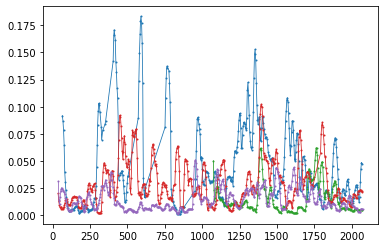

In [14]:
# Rotation-x + 移動標準偏差
plt.figure()

id0_df = suc_output_df[suc_output_df['new_face_id'] == 0]
id1_df = suc_output_df[suc_output_df['new_face_id'] == 1]
id2_df = suc_output_df[suc_output_df['new_face_id'] == 2]
id3_df = suc_output_df[suc_output_df['new_face_id'] == 3]

ws = 10
ax = id0_df['pose_Rx'].rolling(ws).std().plot(x='timestamp', y='pose_Rx', label='id-0', marker='.')
id1_df['pose_Rx'].rolling(ws).std().plot(x='timestamp', y='pose_Rx', label='id-1', marker='.', ax=ax, color='C2')
id2_df['pose_Rx'].rolling(ws).std().plot(x='timestamp', y='pose_Rx', label='id-2', marker='.', ax=ax, color='C3')
id3_df['pose_Rx'].rolling(ws).std().plot(x='timestamp', y='pose_Rx', label='id-3', marker='.', ax=ax, color='C4', subplots=True)

# ax = suc_output_df[suc_output_df['new_face_id'] == 0].rolling(ws).var().plot(x='timestamp', y='pose_Rx', label='id-0', marker='.')
# suc_output_df[suc_output_df['new_face_id'] == 1].rolling(ws).var().plot(x='timestamp', y='pose_Rx', label='id-1', marker='.', ax=ax, color='C2')
# suc_output_df[suc_output_df['new_face_id'] == 2].rolling(ws).var().plot(x='timestamp', y='pose_Rx', label='id-2', marker='.', ax=ax, color='C3')
# suc_output_df[suc_output_df['new_face_id'] == 3].rolling(ws).var().plot(x='timestamp', y='pose_Rx', label='id-3', marker='.', ax=ax, color='C4', subplots=True)

# plt.savefig('pose_Rx.png', facecolor='white', dpi=300)
# plt.close('all')

id0_df

array([<AxesSubplot:xlabel='timestamp'>], dtype=object)

<Figure size 432x288 with 0 Axes>

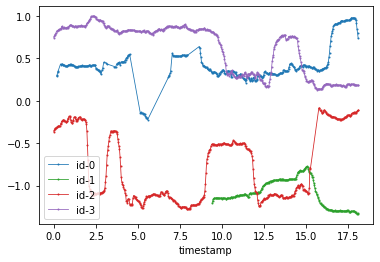

In [15]:
# Rotation-y
plt.figure()

ax = suc_output_df[suc_output_df['new_face_id'] == 0].plot(x='timestamp', y='pose_Ry', label='id-0', marker='.')
suc_output_df[suc_output_df['new_face_id'] == 1].plot(x='timestamp', y='pose_Ry', label='id-1', marker='.', ax=ax, color='C2')
suc_output_df[suc_output_df['new_face_id'] == 2].plot(x='timestamp', y='pose_Ry', label='id-2', marker='.', ax=ax, color='C3')
suc_output_df[suc_output_df['new_face_id'] == 3].plot(x='timestamp', y='pose_Ry', label='id-3', marker='.', ax=ax, color='C4', subplots=True)

# plt.savefig('pose_Ry.png', facecolor='white', dpi=300)
# plt.close('all')

array([<AxesSubplot:xlabel='timestamp'>], dtype=object)

<Figure size 432x288 with 0 Axes>

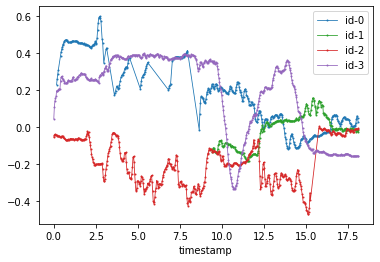

In [16]:
# Rotation-z
plt.figure()

ax = suc_output_df[suc_output_df['new_face_id'] == 0].plot(x='timestamp', y='pose_Rz', label='id-0', marker='.')
suc_output_df[suc_output_df['new_face_id'] == 1].plot(x='timestamp', y='pose_Rz', label='id-1', marker='.', ax=ax, color='C2')
suc_output_df[suc_output_df['new_face_id'] == 2].plot(x='timestamp', y='pose_Rz', label='id-2', marker='.', ax=ax, color='C3')
suc_output_df[suc_output_df['new_face_id'] == 3].plot(x='timestamp', y='pose_Rz', label='id-3', marker='.', ax=ax, color='C4', subplots=True)

# plt.savefig('pose_Rz.png', facecolor='white', dpi=300)
# plt.close('all')

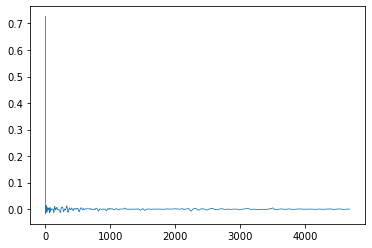

In [17]:
## Rotation-x, y, zの時間あたりの変化量
import numpy as np

dt_list = []
grad_rx_list, grad_ry_list, grad_rz_list = [], [], []

for id in np.sort(suc_output_df['new_face_id'].unique()):
    id = int(id)
    df = suc_output_df[suc_output_df['new_face_id'] == id]
    times = df['timestamp'].to_numpy()
    rx = df['pose_Rx'].to_numpy()
    ry = df['pose_Ry'].to_numpy()
    rz = df['pose_Rz'].to_numpy()
    dt = np.cumsum(times)
    grad_rx = np.gradient(rx, dt)
    grad_ry = np.gradient(ry, dt)
    grad_rz = np.gradient(rz, dt)
    dt_list.append(dt)
    grad_rx_list.append(grad_rx)
    grad_ry_list.append(grad_ry)
    grad_rz_list.append(grad_rz)
    
    
# df_id0 = suc_output_df[suc_output_df['new_face_id'] == 0]
# times_id0 = df_id0['timestamp'].to_numpy()
# rx_id0 = df_id0['pose_Rx'].to_numpy()
# ry_id0 = df_id0['pose_Ry'].to_numpy()
# rz_id0 = df_id0['pose_Rz'].to_numpy()

# dt_id0 = np.cumsum(times_id0)
# grad_rx_id0 = np.gradient(rx_id0, dt_id0)

plt.figure()
plt.plot(dt_list[2], grad_rx_list[2])

# for id in np.sort(suc_output_df['new_face_id'].unique()):
#     id = int(id)
#     dt = dt_list[id]
#     grad = grad_rx_list[id]
#     plt.plot(dt, grad)